In [4]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

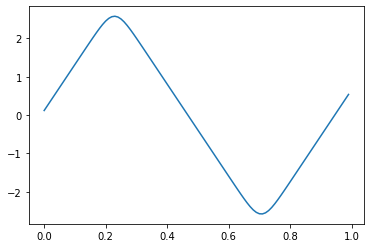

In [20]:
#this is the fourier thing
y = [0, 12] #initial position of oscillator as well as the initial power
h = 0.01 #time step
t = 0. #start time
tend = 1.0 #first period

#this is the function provided
def f(t, y):
    fun = np.zeros(2)
    fun[0] = y[1] #this is the next position step
    fun[1] = -0.01*y[0]**11 #this is the integral equation for the next power step
    return fun

#runga-kutta method
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h, y+k3)
    y+=(1/6)*(k1+2*k2+2*k3+k4)
    return y

#these arrays will hold the time and signal with each time step
tp = []
yp = []
while(t<tend):
    #account for the end of the range
    if((t+h) > tend):
        h = tend-t
        
    #call the runga-kutta method
    y = rk4(t, h, y, 2)
    tp = np.append(tp, t)
    yp = np.append(yp, y[0])
    t = t + h #move to the next time step
    
#plot the graph
plt.plot(tp, yp)
plt.show()

In [23]:
#this is the forier transform

signal = yp #save the initial signal to a new array

N = len(yp) #this is how many N's will be parsed through

nplot = zeros(N, float) #this will hold the different n's used in the graph
fplot = zeros(N, float) #this will hold the signal

dftz = zeros(N, complex) #this will hold the result of the discrete fourier transform

#this will call the discrete fourier transform
def discreteFT():
    for n in range(0, N):
        zsum = complex(0.0, 0.0)                
        for  k in range(0, N): 
            #zexpo = complex(0, 2*np.pi*k*n/N)
            
            #this is the trigonometric expansion of e^i power from it's taylor series
            a = np.cos(2.*np.pi*n*k/N)
            b = np.sin(2.*np.pi*n*k/N)
            
            #sume the transform
            zsum += signal[k]*(complex(a, b))
            
        dftz[n] = zsum * 1./sqrt(2.*np.pi) #this is part of the fourier transform
        nplot[n] = n
        fplot[n] = sqrt((dftz[n].imag**2)+(dftz[n].real**2)) #save the magnitude for the specific frequency

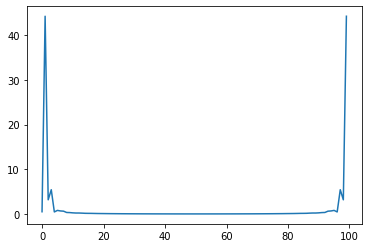

In [24]:
discreteFT()
#this is the discrete forier transform of the graph
plt.plot(nplot, fplot)
plt.show()

In [57]:
#this will look for harmonics that contributed more than 10% |bn/b1| < 0.1
tenPercent = list()
b1 = fplot[1] #I assume this is what it means by b1, though I could be misinterpretting this
for b in range(0, len(fplot)):
    if abs(fplot[b]/b1) >= 0.1:
        tenPercent.append(nplot[b])
        
print(tenPercent)

[1.0, 3.0, 97.0, 99.0]


Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

In [26]:
#this is setting up the initial signal
nt = 300
dt = 20/nt
tarr = arange(0, 20, dt) 
y = zeros(len(tarr))

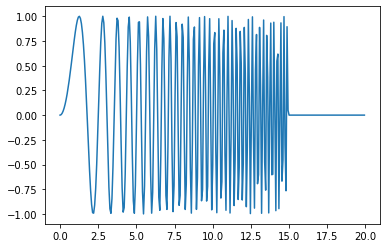

In [27]:
#this is the original graph for the chirp signal between 0 and 15
def func():
    for i in range(len(tarr)):
        if tarr[i] > 0  and tarr[i] < 15:
            y[i] = sin(tarr[i]**2) #this is the piecewise function

#I want to plot it to see it
func() 
plt.plot(tarr, y)
plt.show()


In [62]:
ns=100 #this is how many period's we will check
dstep=2./ns #s step
sar=arange(0.001,2.001,dstep) #create a list

ntau=300 #this is the number of tau's well will shift he wave by
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep) #this is the list of tau shifts


ystau=zeros((ntau, ns),complex) #this will store the transform

In [48]:
def morlet(t, sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma) #the morlet wavelent will be used for this transform with sigma=1.
    return psi

def wavelet():
    #this will call the wavlet transform with tau as the x and s as the y
    for tau in range(ntau):
        for s in range(ns):
            #for each (x,y) you run the following transform on the signal. This should show a trend 
            #that at early tau values, the period will be larger, to match the original signal
            for t in range(nt):
                #this is the series eqivalent of the integal uced for the transform, this series will use
                #a generated daughter wavelet set to be used in the morlet wave transform
                #the daughter waves are determined by the tau and the period used
                ystau[tau, s] += (1/sqrt(sar[s]))*y[t] * dt * conjugate(morlet((tarr[t] - tauar[tau])/sar[s], 1.))

#call the wavlet transform
wavelet()

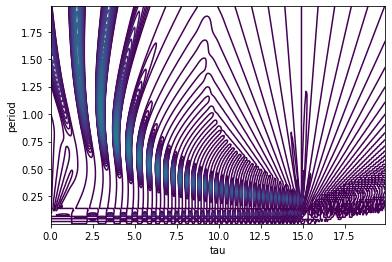

In [51]:
import matplotlib.pylab as p

#a contour graph will be represent this trend
#create the levels by determining the dividing the difference of the max and minimum magnitueds by 100
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)

#call the countour graph. This graphs time to period, with is the inverse of time to frequency
#so the eqivalent inverse graph will show an increase, not a decrease
p.contour(tauar, sar,transpose(ystau).imag, levels=levels)

#label the graph
p.xlabel('tau')
p.ylabel('period')
p.show()

#this graph reads that at lower times, the transform will find waves centered at higher periods, but as the tau becomes larger
#the waves will be found at smaller periods, which means it will be found at larger frequencies
